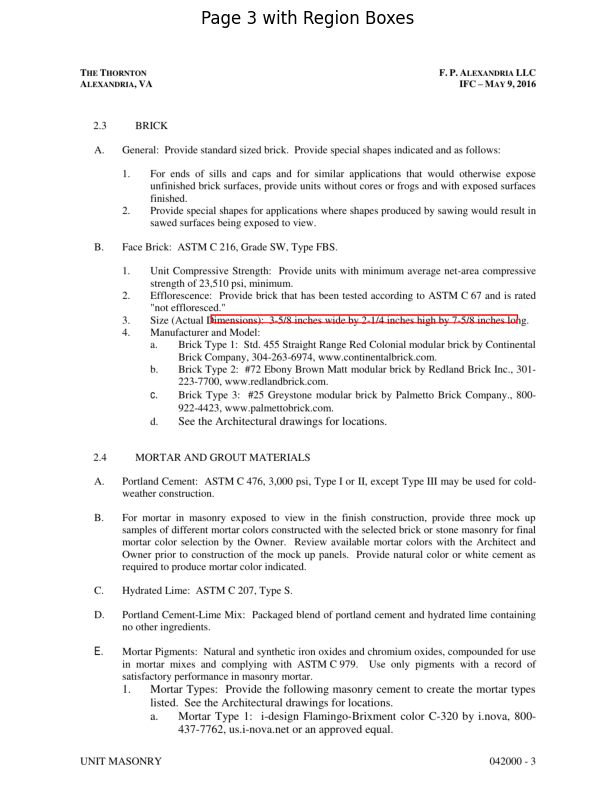

In [10]:
import fitz  # PyMuPDF
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# --- Step 1: Load PDF and extract Sheet 5 ---
pdf_path = "/home/kaifu10/Desktop/wyreai intern/construction_docs/thornton/042000 - Unit Masonry.pdf"  # Replace with your PDF file path
doc = fitz.open(pdf_path)


page_index = 2  # page_num=3 in your JSON => index = 2
page = doc.load_page(page_index)

# High-res render of page 3
pix = page.get_pixmap(dpi=150)
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

# --- Step 2: Draw the bounding boxes from sheet_pts ---
draw = ImageDraw.Draw(img)

# These are the regions from your JSON, simplified to just sheet_pts
regions = [

    [[429, 605], [1086, 605], [1085, 624], [429, 623]],
]

# Draw each polygon in red
for pts in regions:
    draw.polygon([tuple(p) for p in pts], outline="red", width=3)

# --- Step 3: Show the annotated page ---
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.title("Page 3 with Region Boxes")
plt.axis("off")
plt.show()

# Optional: save the result
img.save("page_3_with_boxes.png")

